In [68]:
import pandas
import pyodbc
import matplotlib.pyplot as plt

In [69]:
server = "ey-finance.database.windows.net"
database = "finance"
username = "我的帳號"
password = "我的密碼"
driver = "{ODBC Driver 17 for SQL Server}"

conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};PORT=1433;DATABASE={database};UID={username};PWD={password}")
symbol = "2330"
cursor= conn.cursor()

query = f"SELECT TradeDate, ClosePrice FROM [dbo].[DailyPrice] WHERE Symbol ='{symbol}' ORDER BY TradeDate;"
df = pandas.read_sql(query, conn, index_col="TradeDate")
print(df.head(10)) #印出來看看

            ClosePrice
TradeDate             
2010-01-04        64.9
2010-01-05        64.5
2010-01-06        64.9
2010-01-07        64.2
2010-01-08        64.0
2010-01-11        64.5
2010-01-12        63.6
2010-01-13        62.8
2010-01-14        63.2
2010-01-15        63.5


<AxesSubplot:xlabel='TradeDate'>

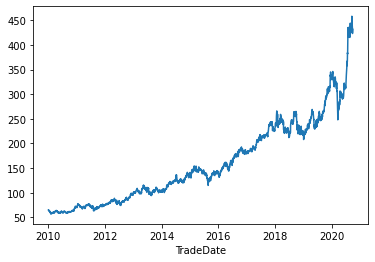

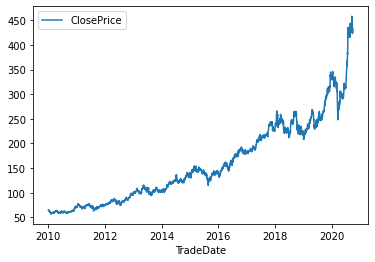

In [70]:
pic = df["ClosePrice"]
pic.plot()
df.plot()   # 效果一樣

In [71]:
# 近20日收盤
c_price_20 = pic.rolling(20, min_periods=1).mean()
c_price_20_2 = df.rolling(20, min_periods=1).mean()

<AxesSubplot:xlabel='TradeDate'>

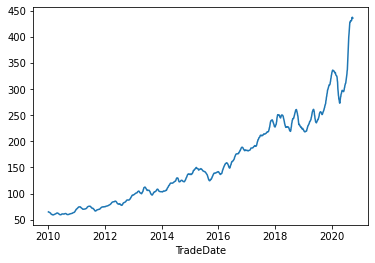

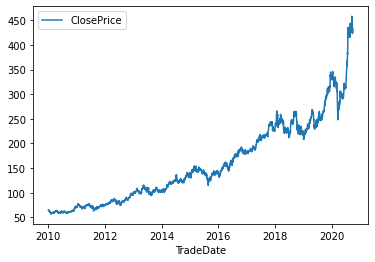

In [72]:
# 印出20日均線
c_price_20.plot()   # 圓滑的均線
df.plot()   # 鋸齒狀的線條